In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

# Preprocesamiento de datos 

In [2]:
data = pd.read_csv("Data_ClientSegmentation2.csv")

In [3]:
data.head()

,CUSTOMER_ID,SALDO_CUENTA,FRECUENCIA_ACTUALIZACION_SALDO,IMPORTE_COMPRAS,IMPORTE_COMPRAS_ONOFF,IMPORTE_COMPRAS_APLAZO,IMPORTE_EFECTIVO_ADELANTADO,FRECUENCIA_COMPRAS,FRECUENCIA_COMPRAS_APLAZO,FRECUENCIA_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_COMPRAS,LIMITE_CREDITO,IMPORTE_PAGOS,IMPORTE_MINIMO_PAGOS,TOTAL_TARJ_CREDITO,TOTAL_VISITAS_ONLINE,TOTAL_VISITAS_OFICINA
0,C18658,2.850024,0.181818,114.56,0.0,114.56,0.000000,0.250000,0.250000,0.000000,0,3,1000.0,403.212926,130.700011,12,3,0
1,C18844,469.319087,0.818182,383.81,0.0,383.81,870.533909,0.583333,0.500000,0.333333,6,14,1500.0,57.924613,335.598994,12,18,0
2,C12288,1504.334228,0.909091,565.00,565.0,0.00,0.000000,0.250000,0.000000,0.000000,0,3,2200.0,2511.315474,471.295665,12,20,5
3,C12767,2061.835735,1.000000,0.00,0.0,0.00,4320.771337,0.000000,0.000000,0.500000,12,0,4000.0,5451.599084,556.327998,12,19,0
4,C11595,18.218714,0.272727,89.00,0.0,89.00,0.000000,0.083333,0.083333,0.000000,0,1,4000.0,1095.921001,173.068884,12,4,1


In [4]:
observaciones, variables = data.shape

In [5]:
print("El conjunto de datos tiene", observaciones, "observaciones y", variables, "variables.")

El conjunto de datos tiene 7994 observaciones y 18 variables.


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7994 entries, 0 to 7993
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CUSTOMER_ID                            7994 non-null   object 
 1   SALDO_CUENTA                           7994 non-null   float64
 2   FRECUENCIA_ACTUALIZACION_SALDO         7994 non-null   float64
 3   IMPORTE_COMPRAS                        7994 non-null   float64
 4   IMPORTE_COMPRAS_ONOFF                  7994 non-null   float64
 5   IMPORTE_COMPRAS_APLAZO                 7994 non-null   float64
 6   IMPORTE_EFECTIVO_ADELANTADO            7994 non-null   float64
 7   FRECUENCIA_COMPRAS                     7994 non-null   float64
 8   FRECUENCIA_COMPRAS_APLAZO              7994 non-null   float64
 9   FRECUENCIA_EFECTIVO_ADELANTADO         7994 non-null   float64
 10  NUM_TRANSACCIONES_EFECTIVO_ADELANTADO  7994 non-null   int64  
 11  NUM_

In [7]:
data = data.drop('CUSTOMER_ID', axis=1)

In [8]:
data.describe()

,SALDO_CUENTA,FRECUENCIA_ACTUALIZACION_SALDO,IMPORTE_COMPRAS,IMPORTE_COMPRAS_ONOFF,IMPORTE_COMPRAS_APLAZO,IMPORTE_EFECTIVO_ADELANTADO,FRECUENCIA_COMPRAS,FRECUENCIA_COMPRAS_APLAZO,FRECUENCIA_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_COMPRAS,LIMITE_CREDITO,IMPORTE_PAGOS,IMPORTE_MINIMO_PAGOS,TOTAL_TARJ_CREDITO,TOTAL_VISITAS_ONLINE,TOTAL_VISITAS_OFICINA
count,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7993.000000,7994.000000,7711.000000,7994.000000,7994.000000,7994.000000
mean,1546.309503,0.877281,980.533134,572.496469,408.337100,968.399100,0.488379,0.363533,0.134831,3.222042,14.575807,4473.361647,1710.939967,853.952727,11.515512,10.384914,1.653240
std,2056.495837,0.236988,1954.559070,1476.628493,896.445531,2049.667814,0.401801,0.396713,0.199833,6.664906,24.472727,3629.182247,2785.099850,2265.252705,1.342628,7.137044,1.800954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,6.000000,0.000000,0.000000
25%,126.134981,0.888889,35.925000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,1.000000,1500.000000,381.806746,168.931243,12.000000,4.000000,0.000000
50%,864.868214,1.000000,354.565000,31.695000,88.915000,0.000000,0.500000,0.166667,0.000000,0.000000,7.000000,3000.000000,848.627488,310.343372,12.000000,9.000000,1.000000
75%,2014.959018,1.000000,1099.545000,564.000000,466.722500,1105.841330,0.916667,0.750000,0.222222,4.000000,17.000000,6500.000000,1896.670997,814.952820,12.000000,16.000000,3.000000
max,19043.138560,1.000000,32539.780000,26547.430000,22500.000000,29282.109150,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,61031.618600,12.000000,25.000000,6.000000


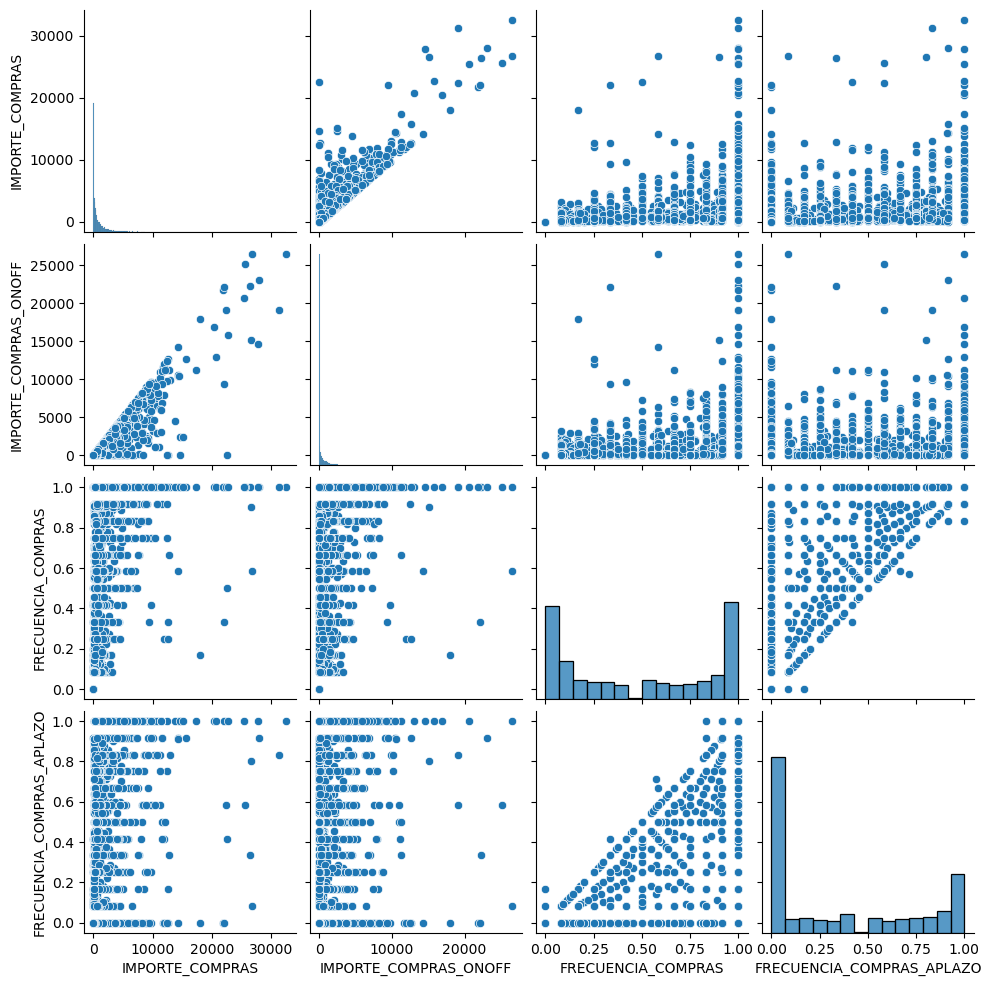

In [9]:
sns.pairplot(data[['IMPORTE_COMPRAS', 'IMPORTE_COMPRAS_ONOFF', 'FRECUENCIA_COMPRAS', 'FRECUENCIA_COMPRAS_APLAZO']])

<Axes: >

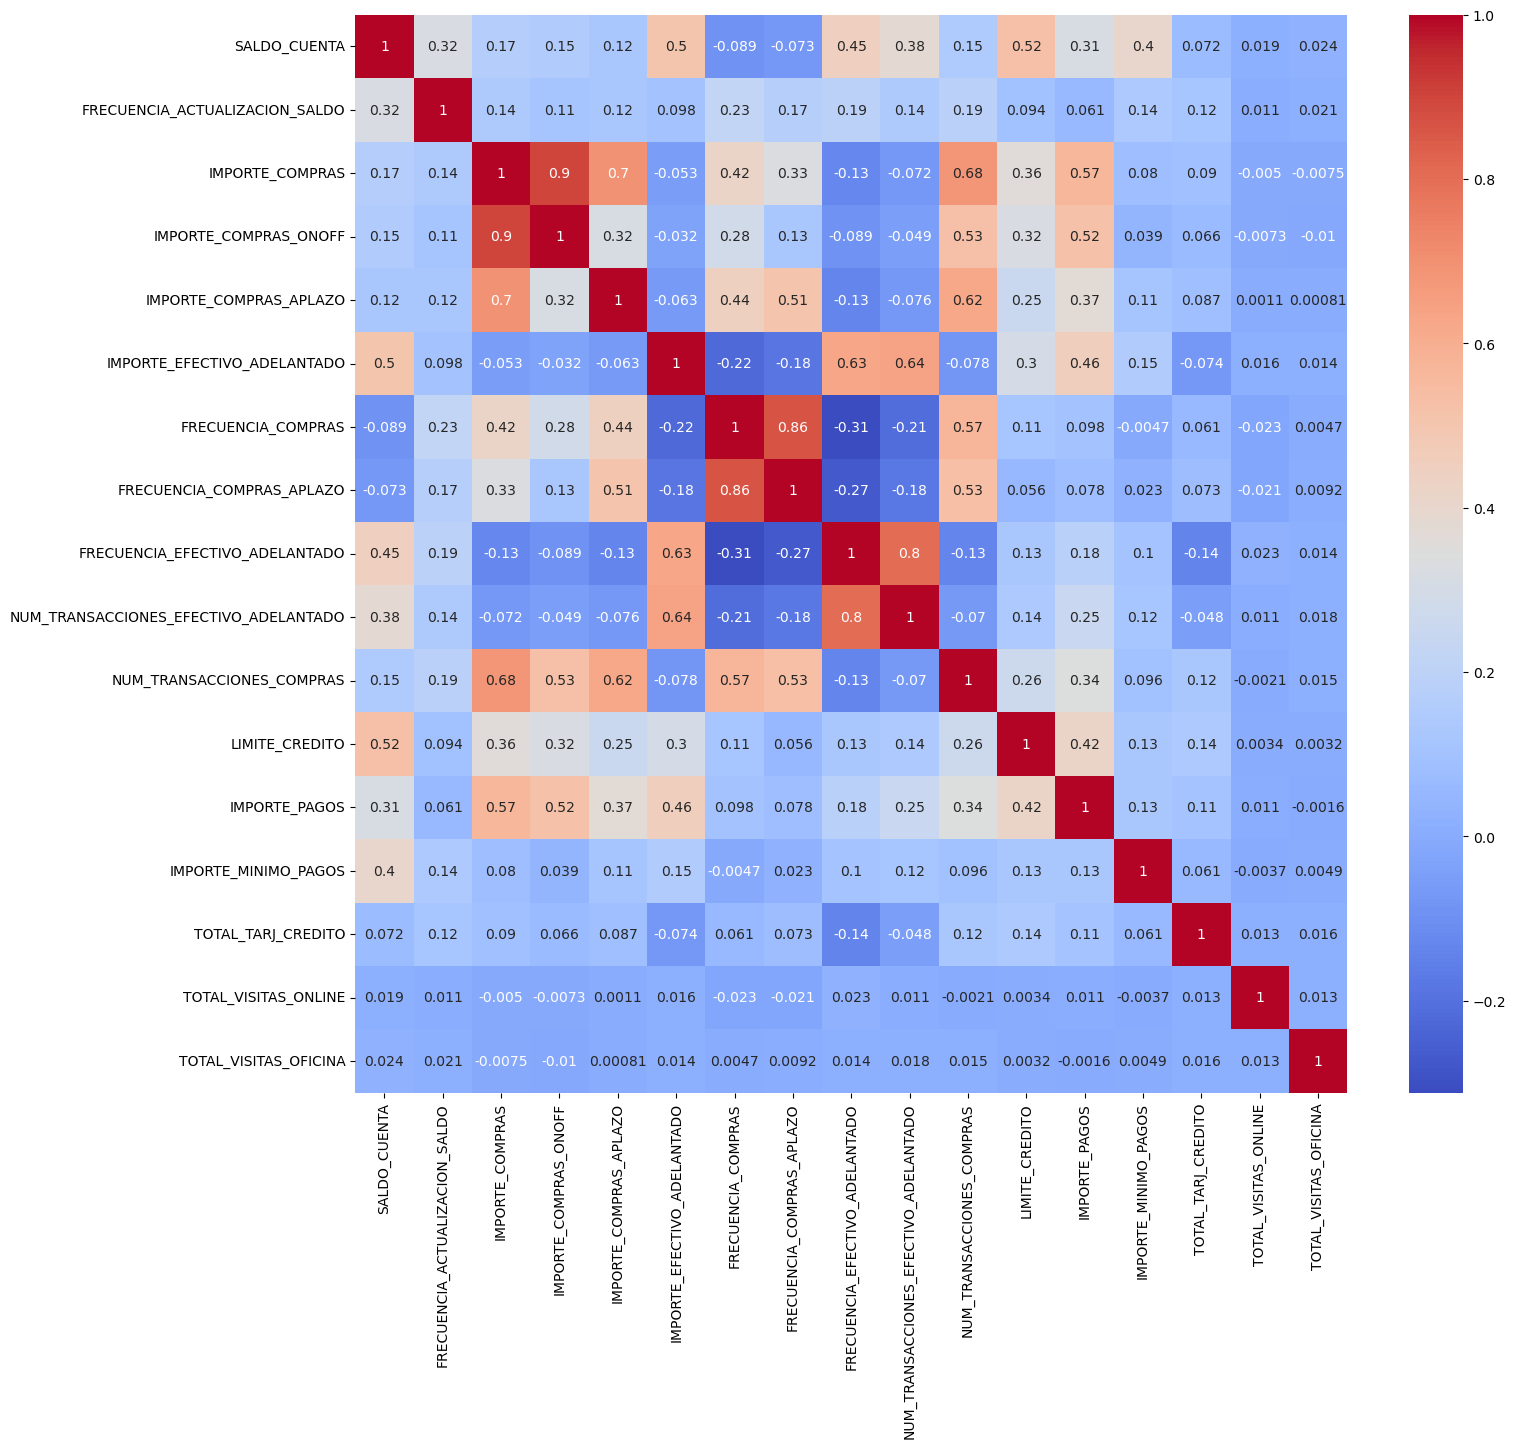

In [10]:
matriz_correlacion = data.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')

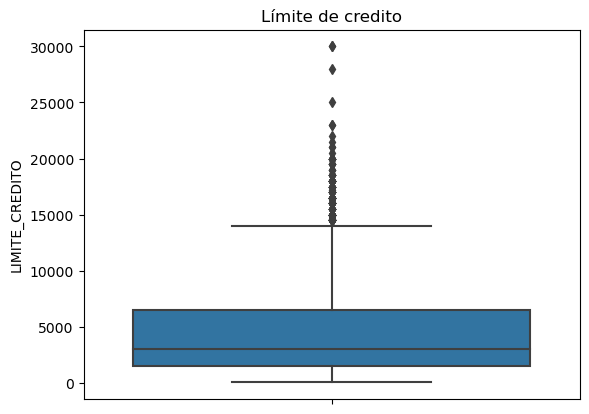

In [11]:
sns.boxplot(y='LIMITE_CREDITO', data=data)
plt.title('Límite de credito')
plt.show()

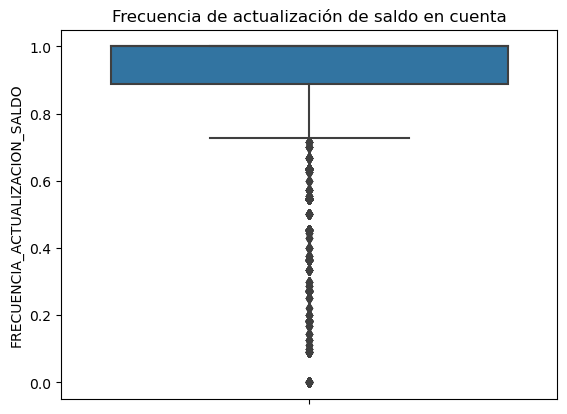

In [12]:
sns.boxplot(y='FRECUENCIA_ACTUALIZACION_SALDO', data=data)
plt.title('Frecuencia de actualización de saldo en cuenta')
plt.show()

In [13]:
print(data.isnull().sum())

SALDO_CUENTA                               0
FRECUENCIA_ACTUALIZACION_SALDO             0
IMPORTE_COMPRAS                            0
IMPORTE_COMPRAS_ONOFF                      0
IMPORTE_COMPRAS_APLAZO                     0
IMPORTE_EFECTIVO_ADELANTADO                0
FRECUENCIA_COMPRAS                         0
FRECUENCIA_COMPRAS_APLAZO                  0
FRECUENCIA_EFECTIVO_ADELANTADO             0
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO      0
NUM_TRANSACCIONES_COMPRAS                  0
LIMITE_CREDITO                             1
IMPORTE_PAGOS                              0
IMPORTE_MINIMO_PAGOS                     283
TOTAL_TARJ_CREDITO                         0
TOTAL_VISITAS_ONLINE                       0
TOTAL_VISITAS_OFICINA                      0
dtype: int64


In [14]:
from sklearn.impute import KNNImputer
# Identificar las columnas con valores nulos
columnas_con_nulos = data.columns[data.isnull().sum() > 0]

# Realizar la imputación con k-Nearest Neighbors
k = 10  # Valor de k para el algoritmo k-Nearest Neighbors (vecinos más cercanos)
imputer = KNNImputer(n_neighbors=k)
data[columnas_con_nulos] = imputer.fit_transform(data[columnas_con_nulos])

print(data.isnull().sum())

SALDO_CUENTA                             0
FRECUENCIA_ACTUALIZACION_SALDO           0
IMPORTE_COMPRAS                          0
IMPORTE_COMPRAS_ONOFF                    0
IMPORTE_COMPRAS_APLAZO                   0
IMPORTE_EFECTIVO_ADELANTADO              0
FRECUENCIA_COMPRAS                       0
FRECUENCIA_COMPRAS_APLAZO                0
FRECUENCIA_EFECTIVO_ADELANTADO           0
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO    0
NUM_TRANSACCIONES_COMPRAS                0
LIMITE_CREDITO                           0
IMPORTE_PAGOS                            0
IMPORTE_MINIMO_PAGOS                     0
TOTAL_TARJ_CREDITO                       0
TOTAL_VISITAS_ONLINE                     0
TOTAL_VISITAS_OFICINA                    0
dtype: int64


In [15]:
# Creación de dataframe escalado
datos_scaled = scale(data)
# Crear un nuevo dataframe con los datos escalados
datos_scaled = pd.DataFrame(datos_scaled, columns=data.columns)

In [16]:
datos_scaled.head()

,SALDO_CUENTA,FRECUENCIA_ACTUALIZACION_SALDO,IMPORTE_COMPRAS,IMPORTE_COMPRAS_ONOFF,IMPORTE_COMPRAS_APLAZO,IMPORTE_EFECTIVO_ADELANTADO,FRECUENCIA_COMPRAS,FRECUENCIA_COMPRAS_APLAZO,FRECUENCIA_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_COMPRAS,LIMITE_CREDITO,IMPORTE_PAGOS,IMPORTE_MINIMO_PAGOS,TOTAL_TARJ_CREDITO,TOTAL_VISITAS_ONLINE,TOTAL_VISITAS_OFICINA
0,-0.750576,-2.934774,-0.443081,-0.387729,-0.327734,-0.472496,-0.593312,-0.286203,-0.674757,-0.483464,-0.473038,-0.957138,-0.469573,-0.329224,0.360873,-1.034795,-0.918037
1,-0.523734,-0.249392,-0.305317,-0.387729,-0.027362,-0.047750,0.236337,0.344015,0.993402,0.416830,-0.023530,-0.819350,-0.593558,-0.237488,0.360873,1.067047,-0.918037
2,-0.020412,0.134234,-0.212610,-0.005077,-0.455535,-0.472496,-0.593312,-0.916420,-0.674757,-0.483464,-0.473038,-0.626446,0.287396,-0.176735,0.360873,1.347293,1.858442
3,0.250698,0.517859,-0.501696,-0.387729,-0.455535,1.635671,-1.215550,-0.916420,1.827483,1.317124,-0.595631,-0.130408,1.343181,-0.138664,0.360873,1.207170,-0.918037
4,-0.743102,-2.551149,-0.456159,-0.387729,-0.356248,-0.472496,-1.008138,-0.706349,-0.674757,-0.483464,-0.554767,-0.130408,-0.220839,-0.310255,0.360873,-0.894672,-0.362742


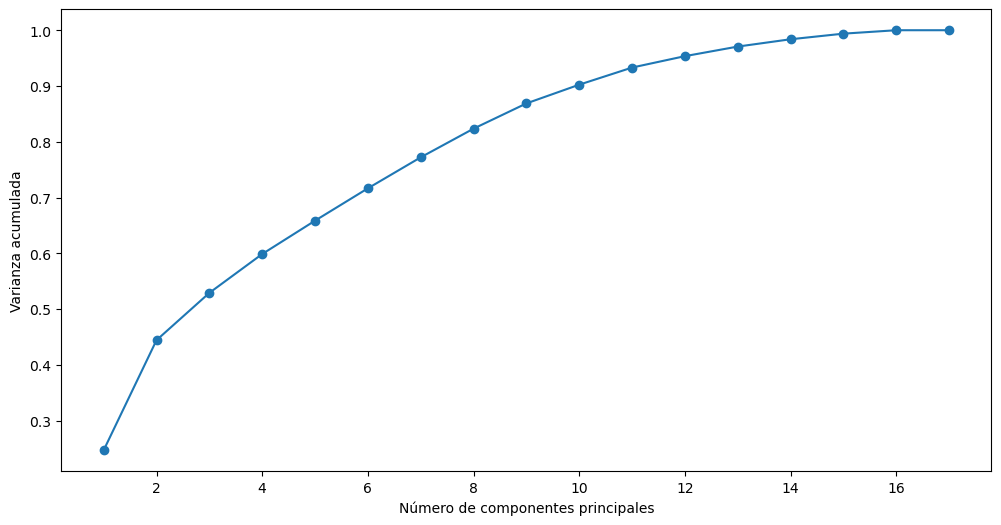

In [17]:
# Calcular número óptimo de componentes

# Crear objeto PCA
pca = PCA()

# Aplicar PCA a los datos normalizados
pca.fit(datos_scaled)

# Obtener la varianza explicada de cada componente principal
var_exp = pca.explained_variance_ratio_

# Obtener la varianza acumulada de los componentes principales
cum_var_exp = np.cumsum(var_exp)

# Obtener el número de características
n_features = datos_scaled.shape[1]

# Crear una gráfica de varianza acumulada vs. número de componentes principales
plt.figure(figsize=(12, 6))
plt.plot(range(1, n_features+1), cum_var_exp, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada')
plt.show()

In [18]:
# Obtener valores en torno a una varianza acumulada del 95% (12 componentes)
n_components = 12  # Componentes principales
pca = PCA(n_components=n_components)

# Aplicar PCA a los datos normalizados
componentes_principales = pca.fit_transform(datos_scaled)

# Crear un nuevo dataframe con los componentes principales
datos_pca = pd.DataFrame(componentes_principales, columns=['Componente Principal {}'.format(i+1) for i in range(n_components)])

# Obtener la varianza explicada por cada componente principal
var_exp = pca.explained_variance_ratio_

# Obtener la varianza acumulada de los componentes principales
cum_var_exp = np.cumsum(var_exp)

# Imprimir la varianza acumulada
print('Varianza explicada por cada componente principal:')
print(var_exp)
print('Varianza acumulada por cada componente principal:')
print(cum_var_exp)

Varianza explicada por cada componente principal:
[0.2471843  0.19727148 0.0847498  0.0696228  0.05979609 0.05798492
 0.05557533 0.05137995 0.0452495  0.03358874 0.03067798 0.02044144]
Varianza acumulada por cada componente principal:
[0.2471843  0.44445578 0.52920558 0.59882838 0.65862447 0.71660939
 0.77218472 0.82356467 0.86881416 0.9024029  0.93308088 0.95352232]


In [19]:
datos_pca.head()

,Componente Principal 1,Componente Principal 2,Componente Principal 3,Componente Principal 4,Componente Principal 5,Componente Principal 6,Componente Principal 7,Componente Principal 8,Componente Principal 9,Componente Principal 10,Componente Principal 11,Componente Principal 12
0,-1.686202,-1.589388,1.552299,-0.358367,1.356527,0.152349,0.207181,-1.652524,0.883999,0.136132,-0.709119,-0.504744
1,-0.648967,-0.143137,-0.725912,-0.651617,-0.356372,-1.427483,-0.321089,-0.270446,0.817671,0.191508,-0.601324,0.041228
2,-0.881287,-0.420663,0.706284,0.860686,-2.235354,0.538840,0.277310,0.501976,0.206644,-0.211861,0.562113,-0.180908
3,-1.161649,3.062241,0.221571,-0.488573,-0.560908,-1.484973,-0.788804,-0.195869,0.726902,-0.203759,0.747063,-0.004589
4,-1.683235,-1.093995,1.881920,0.073351,0.899752,0.484166,0.180732,-1.522071,0.374754,0.297255,-0.496799,-0.160072


# Métodos clustering

## Métodos de asignación (Partitioning Clustering)

K=Nº óptimo de clústers.

Los métodos más utilizados son:

+ El método Elbow

+ Coeficiente de silhouette (sklearn ofrece una guía avanzada.)

+ Estadístico de Gap.

+ Coeficiente de Calinsky.

+ Coeficiente Davies-Bouldin.

C:\Users\icmas\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\icmas\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\icmas\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\icmas\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


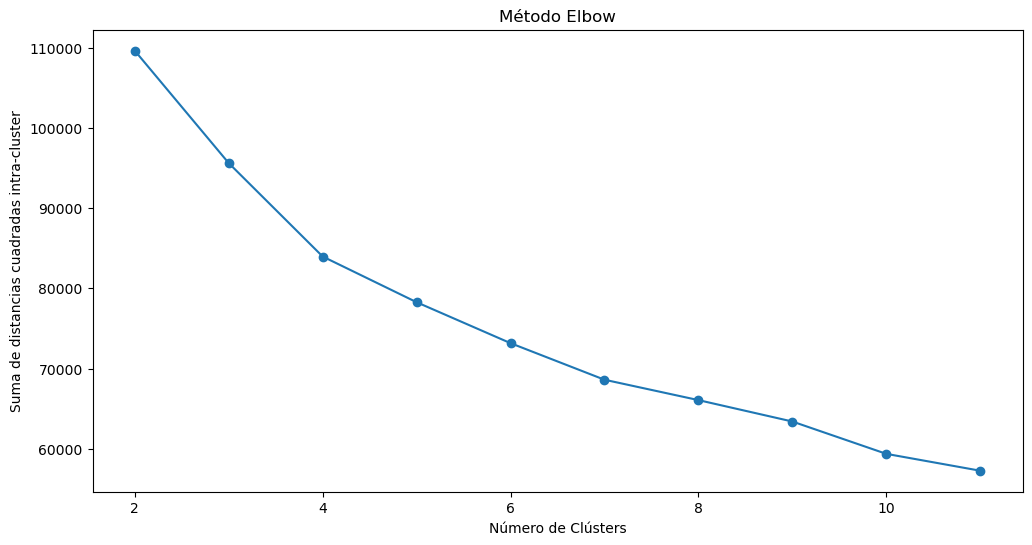

In [20]:
# Método Elbow (codo)
# Lista para almacenar el resultado del método
elbow_scores = []

# Rango de números de clústers para probar
n_clusters_range = range(2, 12)

# Aplicar método del Codo
for n_clusters in n_clusters_range:
    # Inicializar y ajustar el modelo KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=72)
    kmeans.fit(datos_pca)
    
    # Calcular la suma de las distancias cuadradas intra-cluster
    elbow_scores.append(kmeans.inertia_)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, elbow_scores, marker='o')
plt.xlabel('Número de Clústers')
plt.ylabel('Suma de distancias cuadradas intra-cluster')
plt.title('Método Elbow')
plt.show()

C:\Users\icmas\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\icmas\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\icmas\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\icmas\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


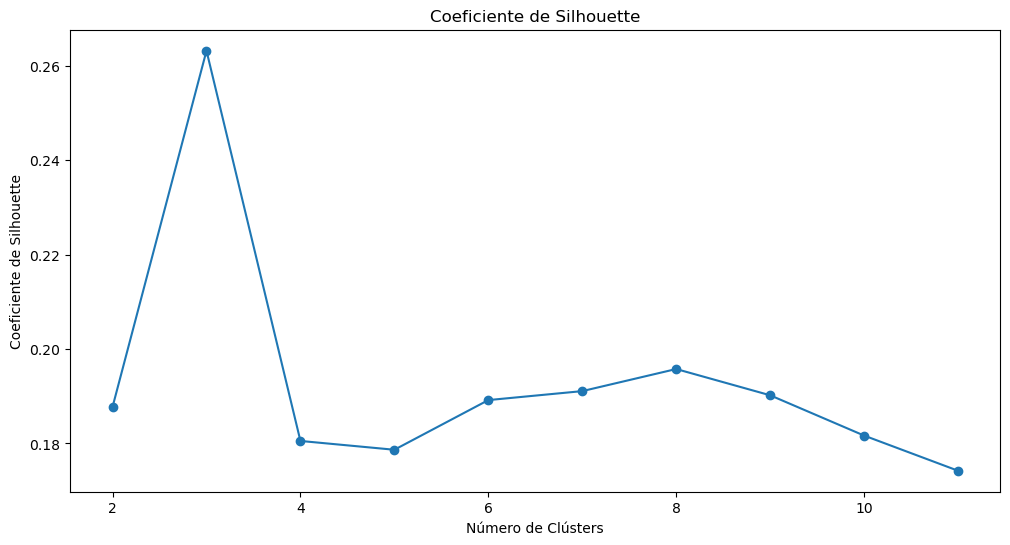

In [21]:
# Coeficiente de silhoutte
# Lista para almacenar el resultado del método
silhouette_scores = []

# Rango de números de clústers para probar
n_clusters_range = range(2, 12)

# Aplicar el coeficiente de Silhouette
for n_clusters in n_clusters_range:
    # Inicializar y ajustar el modelo KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(datos_pca)
    
    # Calcular el coeficiente de Silhouette
    silhouette_scores.append(silhouette_score(datos_pca, kmeans.labels_))

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clústers')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette')
plt.show()

C:\Users\icmas\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


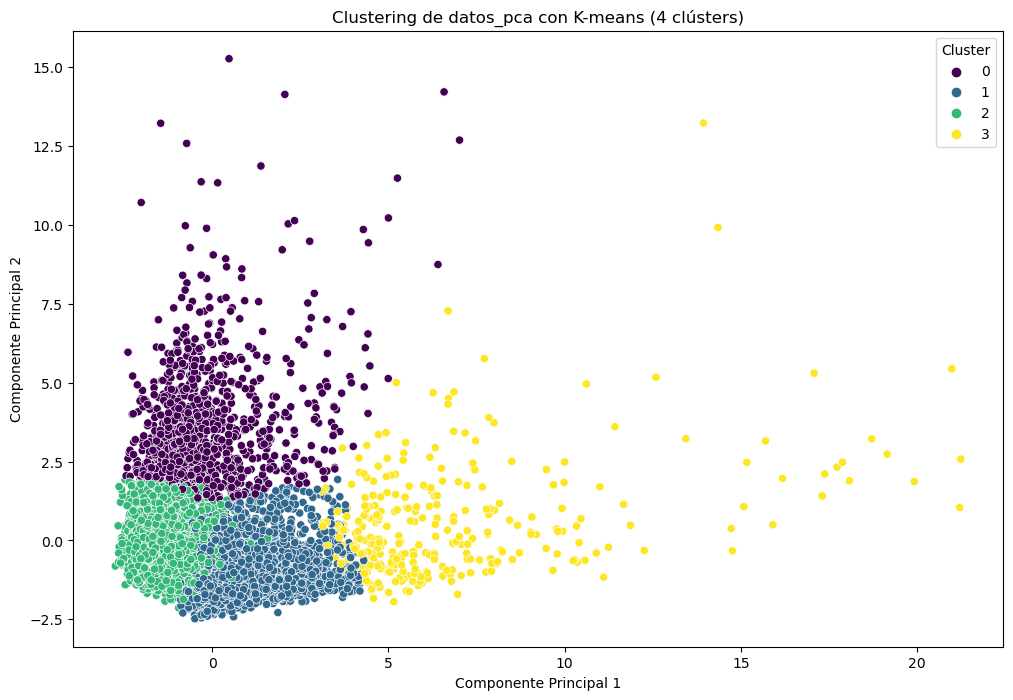

In [22]:
n_clusters = 4  # Número óptimo de clústers obtenido en el método Elbow (codo)
kmeans_Elbow = KMeans(n_clusters=n_clusters, random_state=73)

# Ajusta el modelo de K-means a los datos_pca
kmeans_Elbow.fit(datos_pca)

# Etiquetas de clúster asignadas a cada muestra
labels = kmeans_Elbow.labels_

# DataFrame para los datos_pca
datos_pca_df = pd.DataFrame(datos_pca, columns=['Componente Principal 1', 'Componente Principal 2'])

# Etiquetas de clúster al DataFrame
datos_pca_df['Cluster'] = labels

# Gráfico de dispersión de los dos componentes principales con colores según las etiquetas de clúster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='Cluster', data=datos_pca_df, palette='viridis')
plt.title('Clustering de datos_pca con K-means ({} clústers)'.format(n_clusters))
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

C:\Users\icmas\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


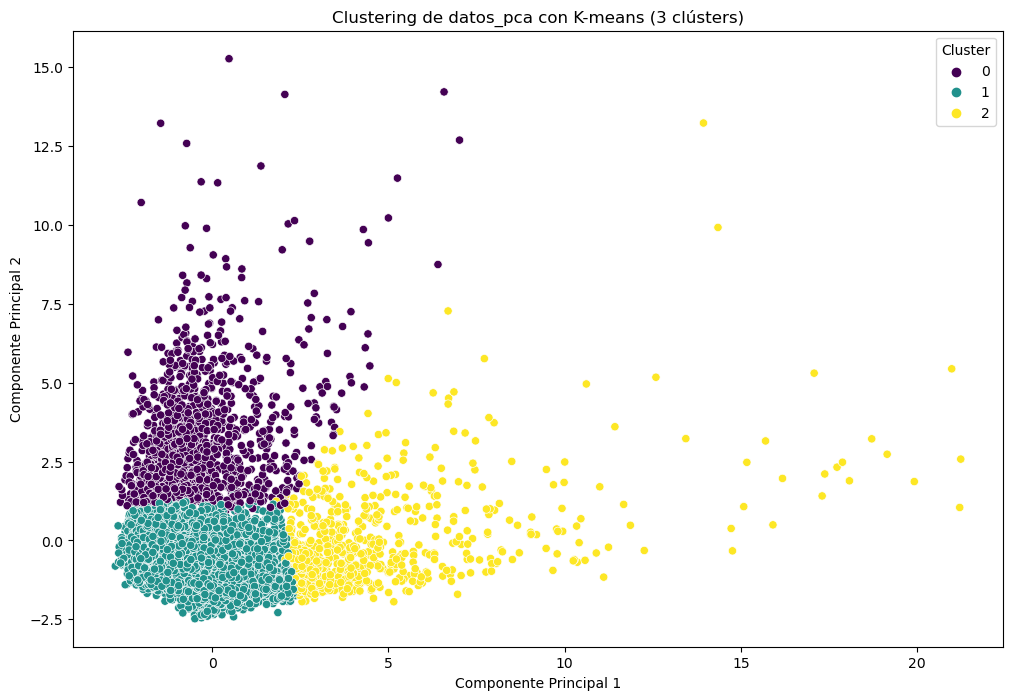

In [23]:
n_clusters = 3  # Número óptimo de clústers obtenido en el coeficiente de silhoutte
kmeans = KMeans(n_clusters=n_clusters, random_state=73)

# Ajusta el modelo de K-means a los datos_pca
kmeans.fit(datos_pca)

# Etiquetas de clúster asignadas a las muestras
labels = kmeans.labels_

# DataFrame para los datos_pca
datos_pca_df = pd.DataFrame(datos_pca, columns=['Componente Principal 1', 'Componente Principal 2'])

# Etiquetas de clúster al DataFrame
datos_pca_df['Cluster'] = labels

# Gráfico de dispersión de los dos componentes principales con colores según las etiquetas de clúster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='Cluster', data=datos_pca_df, palette='viridis')
plt.title('Clustering de datos_pca con K-means ({} clústers)'.format(n_clusters))
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

## Métodos jerárquicos (Hierarchical Clustering)

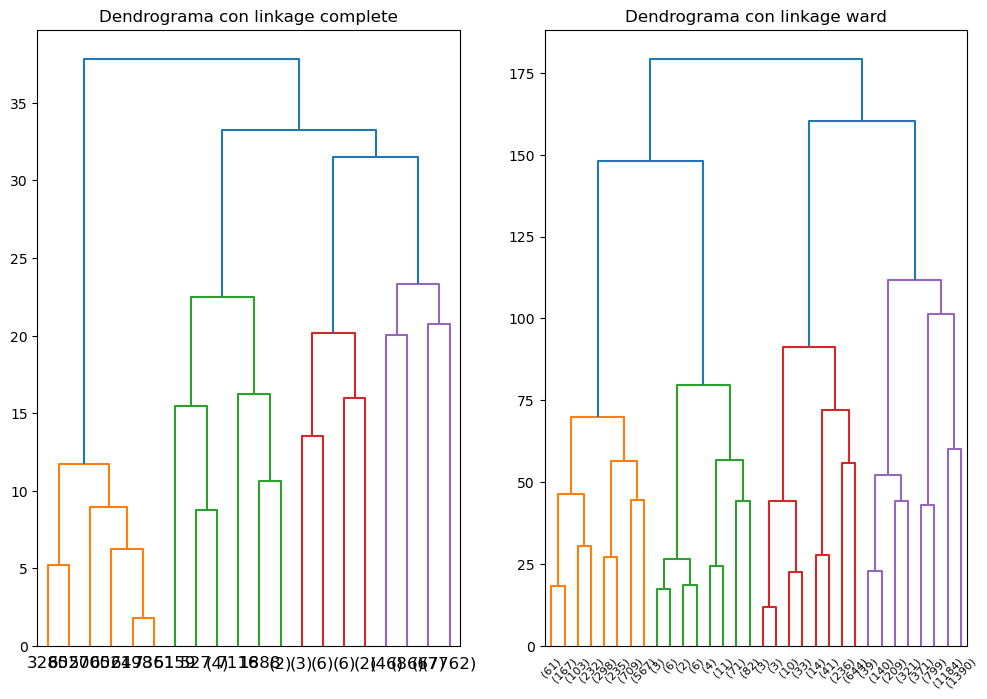

In [24]:
# Matriz de distancias
distancias = pdist(datos_pca)

# Matriz de enlace con linkage complete
enlace_complete = linkage(distancias, method='complete')

# Matriz de enlace con linkage ward
enlace_ward = linkage(distancias, method='ward')

# Visualización de los dendrogramas
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title('Dendrograma con linkage complete')
dendrogram(enlace_complete, truncate_mode='level', p=4)
plt.subplot(1, 2, 2)
plt.title('Dendrograma con linkage ward')
dendrogram(enlace_ward, truncate_mode='level', p=4)
plt.show()

C:\Users\icmas\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


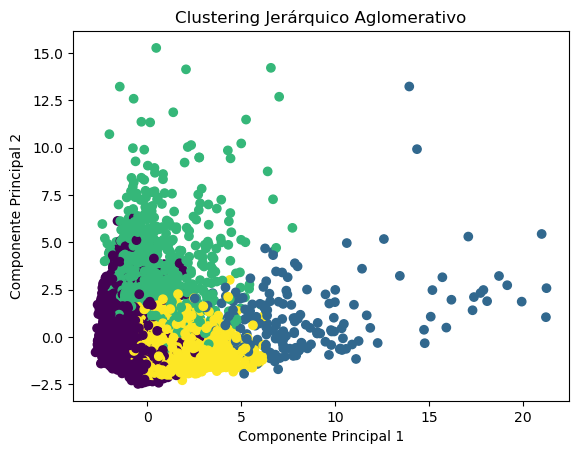

In [25]:
# Modelo aglomerativo
n_clusters_optimo = 4  # Valor óptimo del número de clusters seleccionado en el apartado a
modelo_aglomerativo = AgglomerativeClustering(n_clusters=n_clusters_optimo, affinity='euclidean', linkage='ward')

# Ajustar el modelo
clusters_aglomerativos = modelo_aglomerativo.fit_predict(datos_pca)

# Resultado con 2 componentes principales de datos_pca
plt.scatter(datos_pca.iloc[:, 0], datos_pca.iloc[:, 1], c=clusters_aglomerativos, cmap='viridis')
plt.title('Clustering Jerárquico Aglomerativo')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

## Comparación de resultados

In [26]:
# Coeficiente de Silhouette para K-means
clusters_kmeans = kmeans.labels_
silhouette_kmeans = silhouette_score(datos_pca, clusters_kmeans)

# Coeficiente de Silhouette para Clustering Jerárquico Aglomerativo
clusters_agglo = modelo_aglomerativo.labels_ 
silhouette_agglo = silhouette_score(datos_pca, clusters_agglo)

# Resultados
print(f"Coeficiente de Silhouette para K-means: {silhouette_kmeans}")
print(f"Coeficiente de Silhouette para Clustering Jerárquico Aglomerativo: {silhouette_agglo}")

Coeficiente de Silhouette para K-means: 0.26323567398387415
Coeficiente de Silhouette para Clustering Jerárquico Aglomerativo: 0.14735434915382337


C:\Users\icmas\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


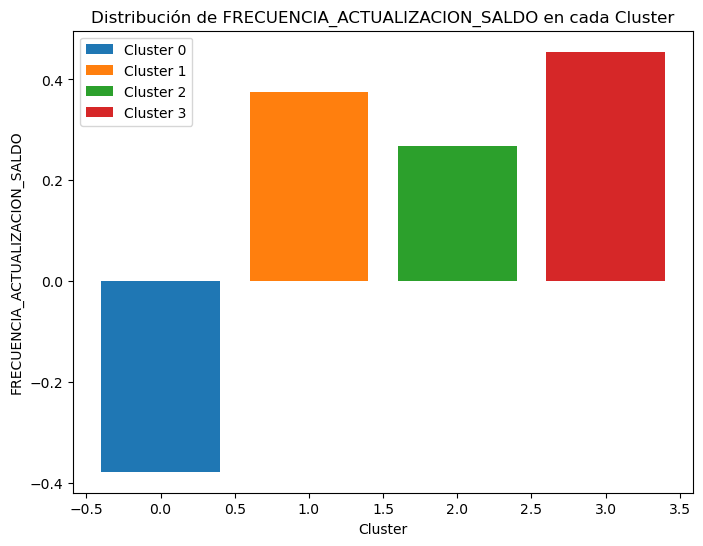

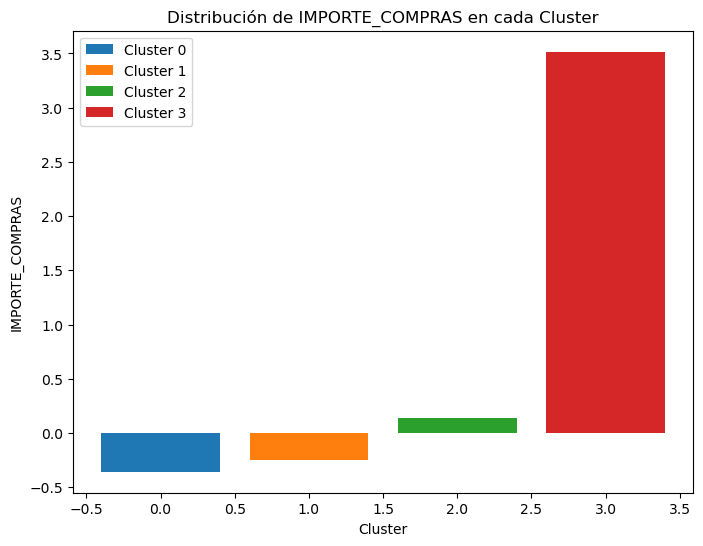

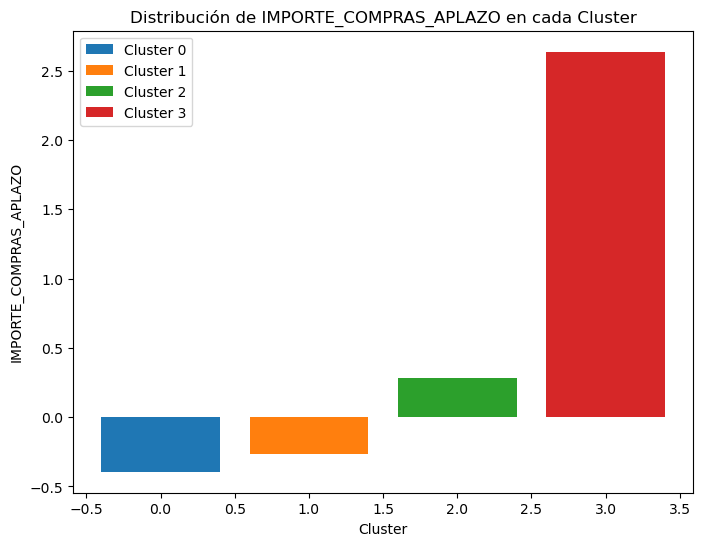

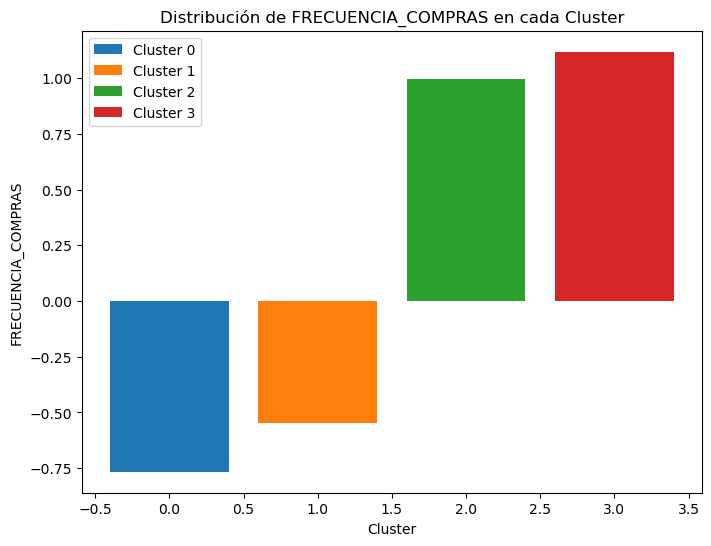

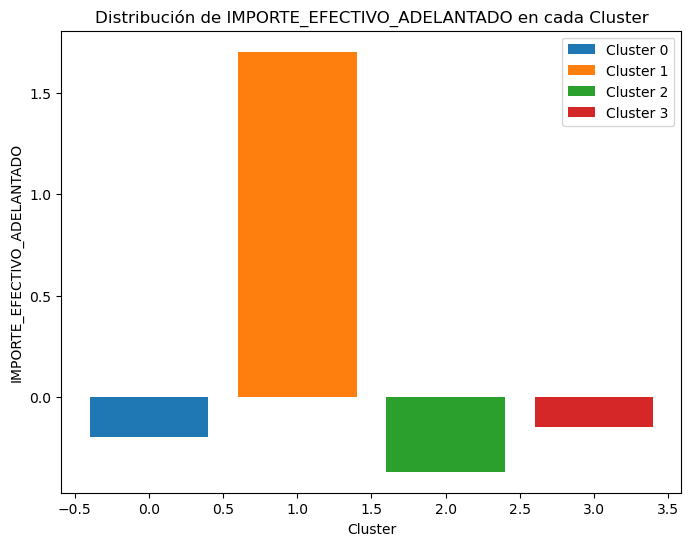

In [27]:
# Aplicar K-means
kmeans = KMeans(n_clusters=4)  # Definir el número de clusters a obtener
kmeans.fit(datos_scaled)  # Ajustar el modelo de K-means
labels = kmeans.labels_  # Obtener las etiquetas de cluster asignadas a cada muestra
datos_scaled['cluster'] = labels  # Añadir las etiquetas de cluster como una nueva columna en el dataframe

# Valor medio de cada variable en cada cluster
df_cluster_means = datos_scaled.groupby('cluster').mean()

# Distribuciones de las variables más significativas
variables_interes = ['FRECUENCIA_ACTUALIZACION_SALDO',	'IMPORTE_COMPRAS', 'IMPORTE_COMPRAS_APLAZO', 'FRECUENCIA_COMPRAS', 'IMPORTE_EFECTIVO_ADELANTADO']
for variable in variables_interes:
    plt.figure(figsize=(8, 6))
    for i in range(len(df_cluster_means)):
        plt.bar(i, df_cluster_means[variable][i], label=f'Cluster {i}')
    plt.xlabel('Cluster')
    plt.ylabel(variable)
    plt.title(f'Distribución de {variable} en cada Cluster')
    plt.legend()
    plt.show()

In [28]:
# Características de cada grupo de clientes
for i in range(len(df_cluster_means)):
    print(f'Cluster {i}:')
    print('Características promedio de los clientes en este cluster:')
    print(df_cluster_means.iloc[i, :-1])  # Valores medios de las variables en cada cluster
    print('-----')

Cluster 0:
Características promedio de los clientes en este cluster:
SALDO_CUENTA                            -0.276110
FRECUENCIA_ACTUALIZACION_SALDO          -0.378078
IMPORTE_COMPRAS                         -0.356533
IMPORTE_COMPRAS_ONOFF                   -0.233175
IMPORTE_COMPRAS_APLAZO                  -0.393456
IMPORTE_EFECTIVO_ADELANTADO             -0.195477
FRECUENCIA_COMPRAS                      -0.765937
FRECUENCIA_COMPRAS_APLAZO               -0.726688
FRECUENCIA_EFECTIVO_ADELANTADO          -0.116056
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO   -0.176382
NUM_TRANSACCIONES_COMPRAS               -0.465908
LIMITE_CREDITO                          -0.318323
IMPORTE_PAGOS                           -0.267565
IMPORTE_MINIMO_PAGOS                    -0.127554
TOTAL_TARJ_CREDITO                      -0.050997
TOTAL_VISITAS_ONLINE                     0.004449
Name: 0, dtype: float64
-----
Cluster 1:
Características promedio de los clientes en este cluster:
SALDO_CUENTA                    

Los clusters que parecen prioritarios para realizar estrategias comerciales son el Cluster 0 y el Cluster 2.

Los clientes del Cluster 0 son activos en el uso de su tarjeta de crédito y podrían ser objetivos clave para estrategias comerciales que promuevan el uso de la tarjeta para compras y promociones especiales en las que se puedan beneficiar de las ventajas de la financiación a plazo.

Los clientes del Cluster 2 son gastadores activos y podrían ser objetivos ideales para estrategias comerciales que fomenten un mayor gasto con la tarjeta de crédito, promociones de compras a plazo o programas de recompensas basados en el gasto.

En resumen, el Cluster 0 y el Cluster 2 parecen prioritarios para realizar estrategias comerciales debido a que los clientes en estos grupos muestran un alto uso de tarjeta de crédito y un comportamiento de compra activo, lo que ofrece oportunidades para promover el uso de la tarjeta de crédito, incrementar el gasto y fomentar la fidelidad del cliente. 
